In [292]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import matplotlib as mpl
import scienceplots

# Science plot package + Dracula theme
plt.style.use(['science', 'dark_background'])
plt.rcParams['axes.facecolor'] = '#282a36'
plt.rcParams['figure.facecolor'] = '#282a36'
colorcycle = ['#8be9fd', '#ff79c6', '#50fa7b', '#bd93f9', '#ffb86c', '#ff5555', '#f1fa8c', 
'#6272a4']
plt.rcParams['axes.prop_cycle'] = mpl.cycler(color=colorcycle)
white = '#f8f8f2' # foreground

# change dpi
plt.rcParams['figure.dpi'] = 512

## Problem 1

(a) Given $U(x) = x^3 - 3x$, solving for equilibrium points:
$$ U'(x) = 3x^2 - 3 = 0 \Rightarrow x = \pm 1$$
So the equilibrium points are at $P = (-1, 1)$ and $Q = (1, -2)$.

Equilibrium points: [-1, 1], [2, -2]


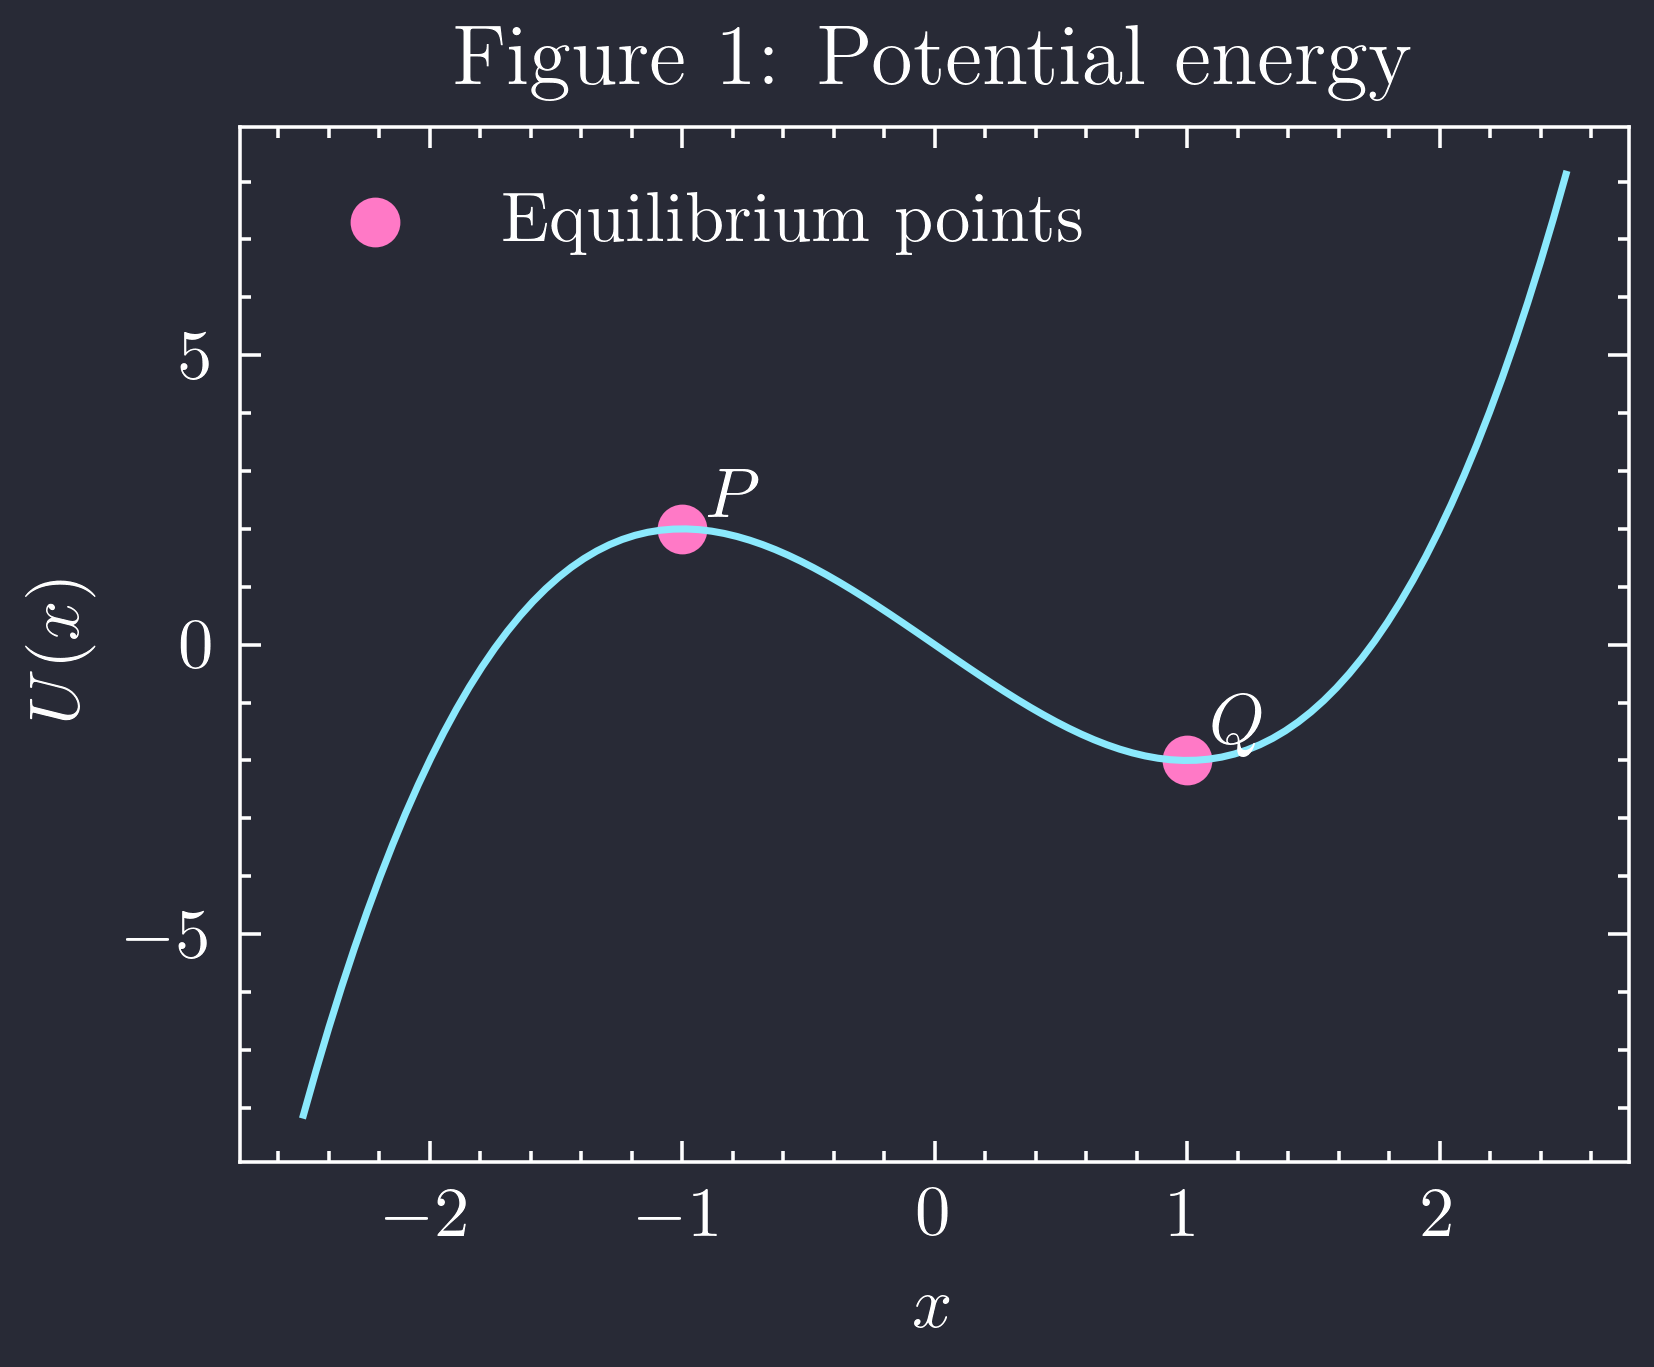

In [293]:
# const
x = np.linspace(-2.5, 2.5, 100)

# U(x) 
def U(x):
    return x ** 3 - 3 * x

# U'(x)
def U_prime(x):
    return 3 * x ** 2 - 3

# Equilibrium points
x_eq = [-1, 1]
y_eq = [U(-1), U(1)]

print(f'Equilibrium points: {x_eq}, {y_eq}')

# Plot U(x)
plt.plot(x, U(x))
plt.scatter(x_eq, y_eq, color=colorcycle[1], label='Equilibrium points')
plt.annotate('$P$', xy=(-1+0.1, U(-1)+0.2))
plt.annotate('$Q$', xy=(1+0.1, U(1)+0.3))
plt.xlabel('$x$')
plt.ylabel('$U(x)$')
plt.title('Figure 1: Potential energy')
plt.legend()
plt.show()

(b) For a small deviation $dx$ we know that force is a negative gradient of potential, and in this 1D case
$$ F = -\frac{dU}{dx} $$
or the multiplying the slope by $-1$. For the first equilibrium point $P$ as the particle deviates slightly to the 
right (positive $x$ direction), the slope is negative, so the resulting force is a positive value which means that the particle
will be pushed further away from the equilibrium point. And for a small deviation left, the resulting force (negative) will push the particle left and away from $P$. So $P$ is an unstable equilibrium point as the particle is pushed away from the
equilibrium point for a small deviation. 

For the second equilibrium point we can see that the particle will tend back towards the equilibrium point for a small deviation, so $Q$ is a stable equilibrium point as the resulting force will push the particle back towards $Q$.

(c) First we can taylor expand the potential energy $U(x)$ around the stable equilibrium point $x_o = 1$ and 
by setting the reference point at $x_o$ the first term $U(x_o) = 0$ and the second term $U'(x_o) = 0$ 
due to the conservative nature of the force. We are then left with the second order term
$$ U(x) \approx \frac{1}{2} U''(x_o) (x - x_o)^2$$
where the spring constant $k = U''(x_o) = 6(x_o) = 6$. We can now identify the angular frequency of small
oscillations around $Q$ for a particle of mass $m$ as
$$ \omega_o = \sqrt{\frac{6}{m}} $$

## Problem 2

(a) Rewritting the EOM from HW 3 so we have $\ddot r$ and $\ddot \phi$ on the left hand side
$$ \dot v_r = \ddot r = r \omega^2 - \frac{k}{m} (r - a) $$
and 
$$ \dot \omega = \ddot \phi = -\frac{2 v_r \omega}{r} $$

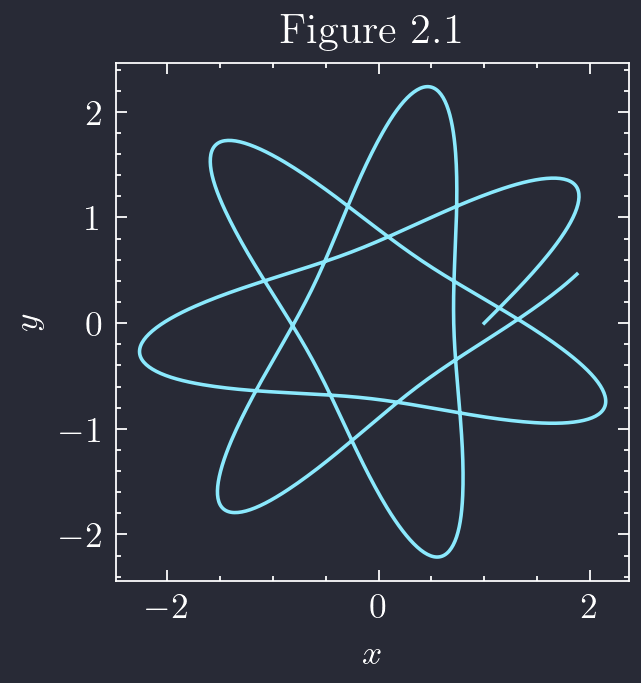

In [325]:
# 2(a)
def mass_rotating_spring(t, s): # s[0] = r, s[1] = phi
    r = s[0]
    v_r = s[2]
    omega = s[3]
    dot_v_r = r * omega ** 2 - k / m * (r - a)
    dot_omega = -2 * v_r * omega / r
    return [v_r, omega, dot_v_r, dot_omega]

# 2(b)
# constants
k = 10 # N / m
a = 1 # m
m = 1 # kg
t = np.linspace(0, 10, 1000)

# initial conditions
r_o = a  # 1 m
v_o = 3 # m / s
omega_o = v_o / r_o # rad / s


# xy position
def x(r, phi): # r = s[0], phi = s[1]; x = r * cos(phi)
    return r * np.cos(phi)

def y(r, phi): # y = r * sin(phi)
    return r * np.sin(phi)

# solve ode
from scipy.integrate import solve_ivp
solution_r_omega = solve_ivp(mass_rotating_spring, [0, 10], [r_o, 0, v_o, omega_o], t_eval=t, dense_output=True)

# plot
def pos(sol):
    r_pos = sol.y[0]
    phi_pos = sol.y[1]
    x_pos = x(r_pos, phi_pos)
    y_pos = y(r_pos, phi_pos)
    return x_pos, y_pos
x_pos, y_pos = pos(solution_r_omega)
plt.figure().set_dpi(256)
plt.plot(x_pos, y_pos)
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.gca().set_aspect("equal")
plt.title('Figure 2.1')
plt.show()

(b) As the spring rotates about the origin, the mass will oscillate in the radial direction. From 
the figure above we can see roughly 6 rounded points which are the position when the spring is at 
max amplitude. Following the path starting at its initial pos ($1,0$) as the spring rotates, the
radial position of the mass starts moving away from the origin until it reaches max amplitude
(the first rounded point) and moves back towards the origin until it reaches its max compression
(point closest to origin) and repeats the cycle hence the oscillatory motion.

This is similar to the anisotropic oscillator showing quasiperiodic motion and plotting this out for
more time as shown in Figure 2.2, we can see that we probably won't get a **closed path**.
In addition, plotting out the position as function of time for each axis (Figure 2.3) we can see
that these *roughly* sinusoidal functions are not in phase with each other, and the period is not
exactly the same/rationally related.

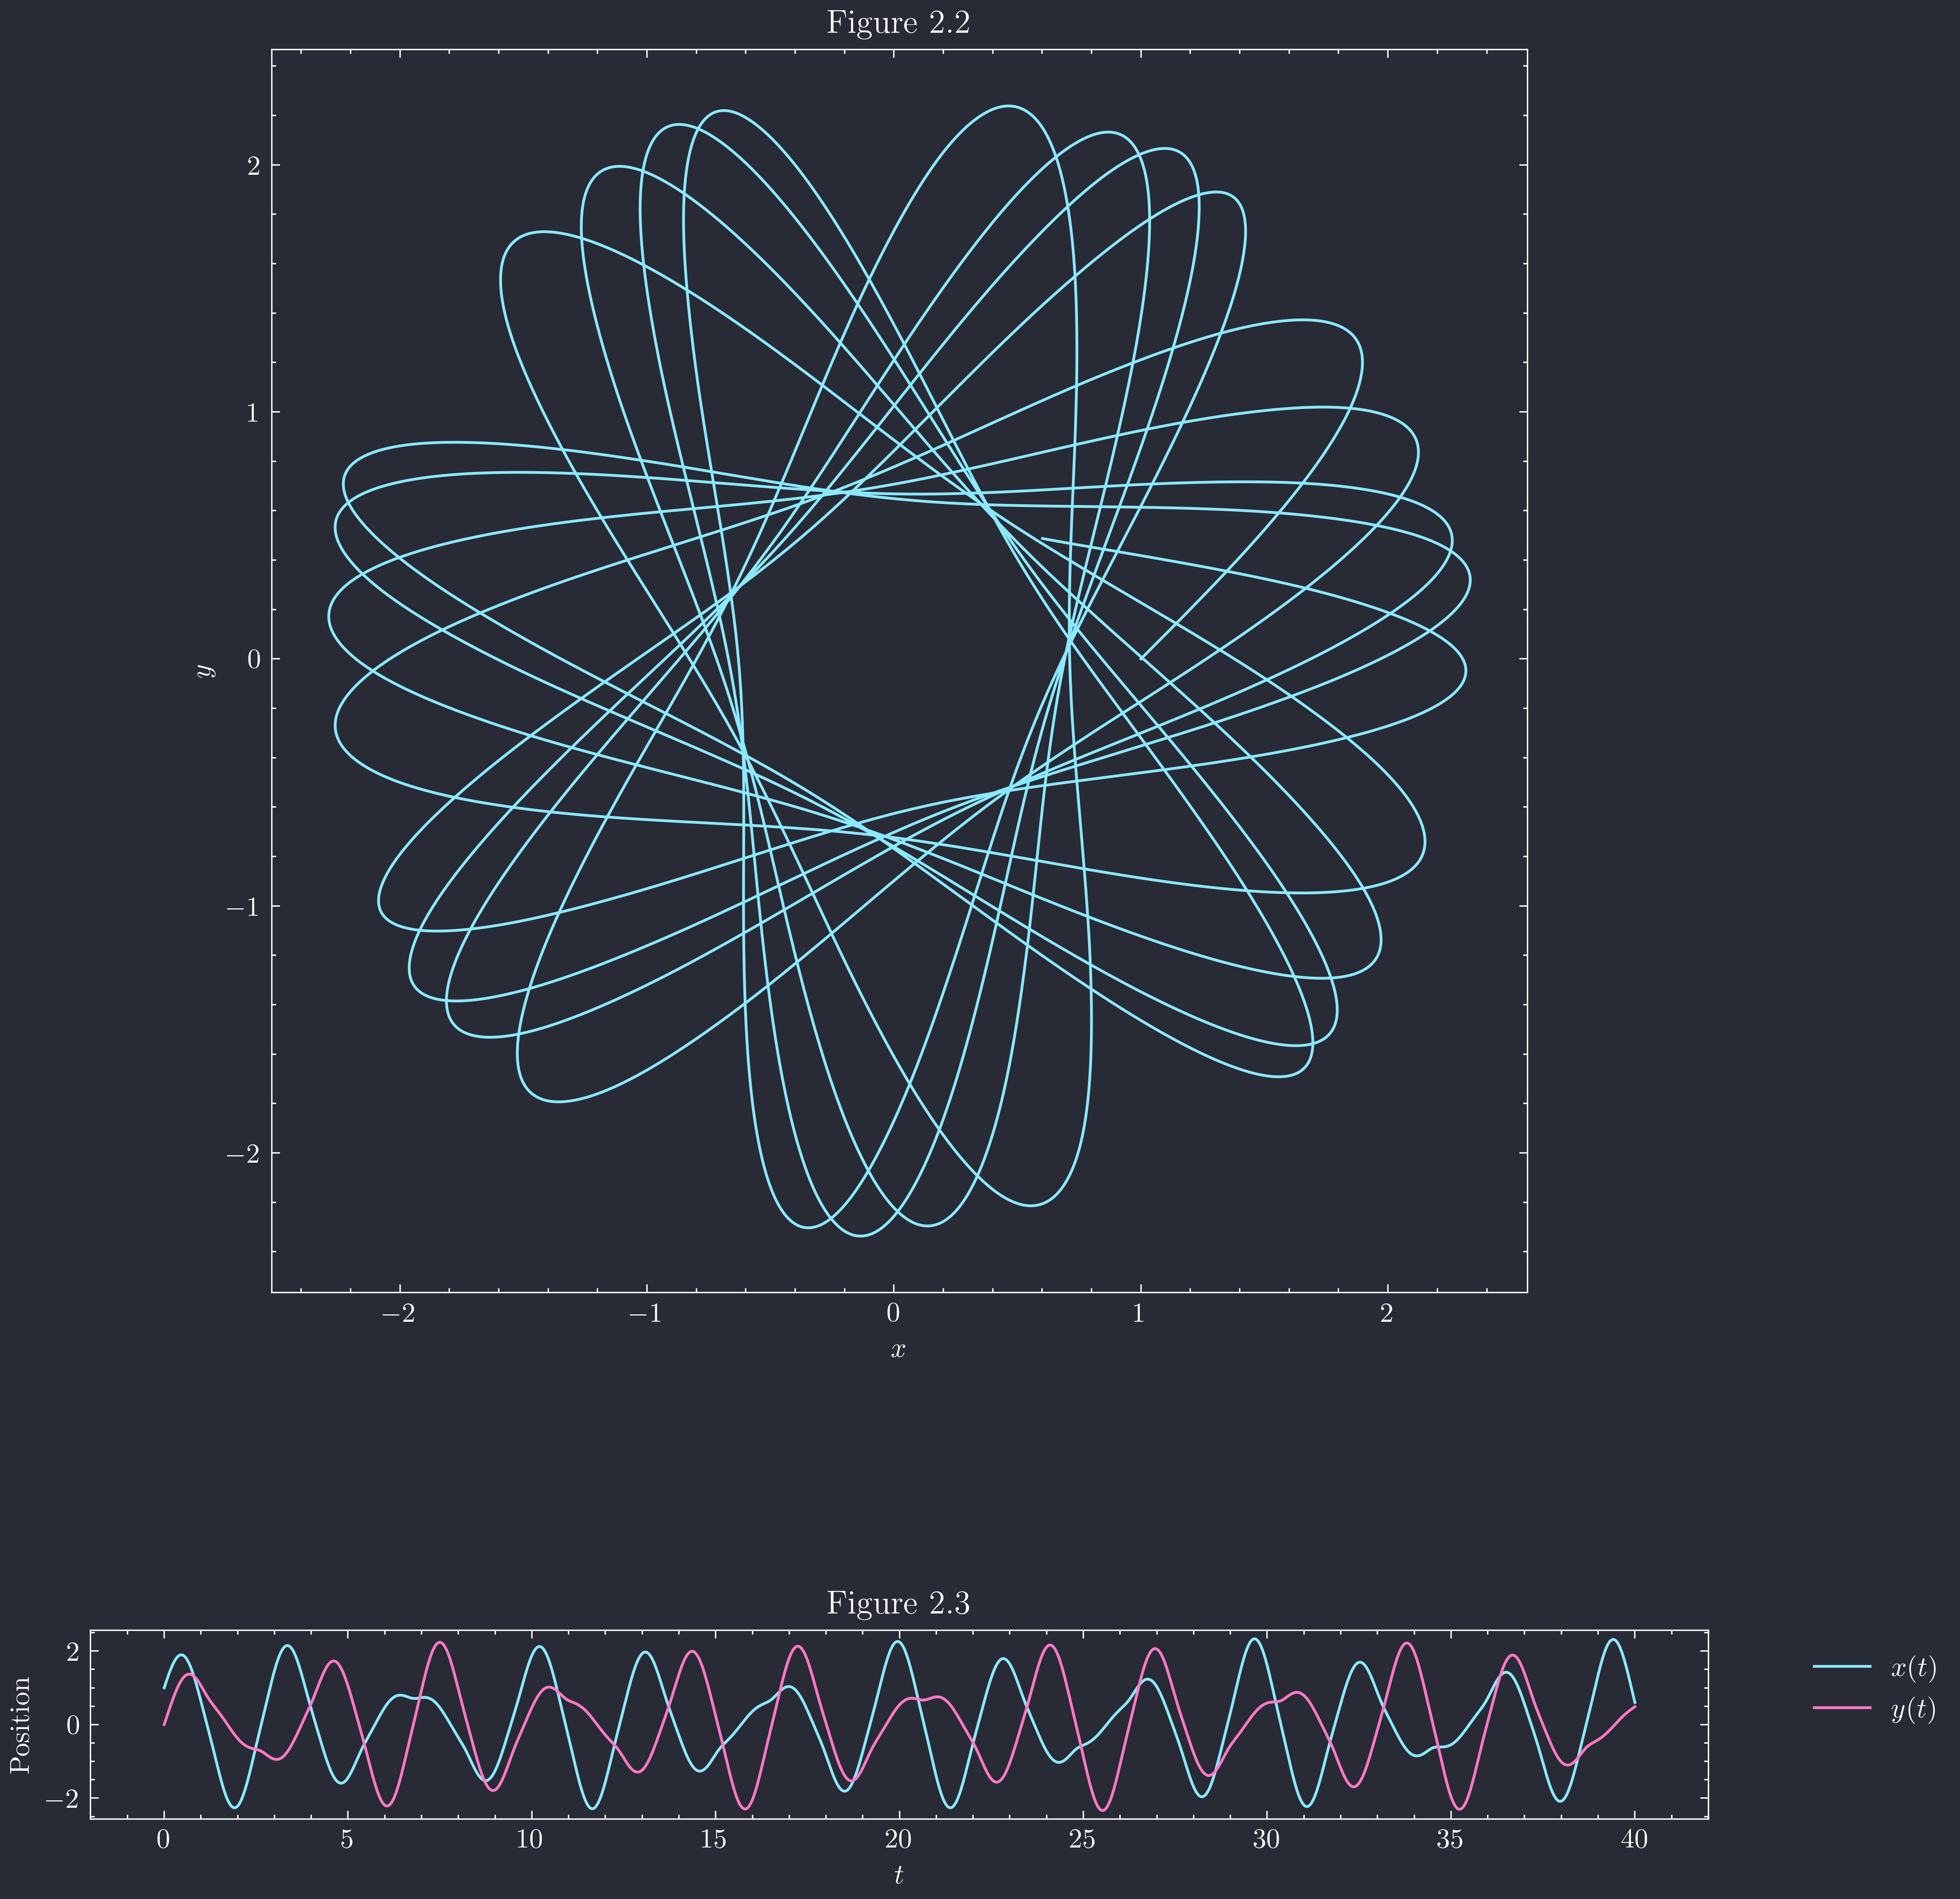

In [323]:
# plotting for more time 
t_f = 40
t_new = np.linspace(0, t_f, 10000)
sol2 = solve_ivp(mass_rotating_spring, [0, t_f], [r_o, 0, v_o, omega_o], t_eval=t_new, dense_output=True)
x_pos2, y_pos2 = pos(sol2)

# subplot
fig, axs = plt.subplots(2, 1, figsize=(10, 12))

# Plot Figure 2.2
axs[0].plot(x_pos2, y_pos2)
axs[0].set_xlabel('$x$')
axs[0].set_ylabel('$y$')
axs[0].set_aspect("equal")
axs[0].set_title('Figure 2.2')

# Plot Figure 2.3
axs[1].plot(t_new, x_pos2, label='$x(t)$')
axs[1].plot(t_new, y_pos2, label='$y(t)$')
axs[1].set_xlabel('$t$')
axs[1].set_ylabel('Position')
axs[1].set_aspect("equal")
axs[1].legend(bbox_to_anchor=(1.05, 1), loc='upper left')
axs[1].set_title('Figure 2.3')

plt.tight_layout()
plt.show()


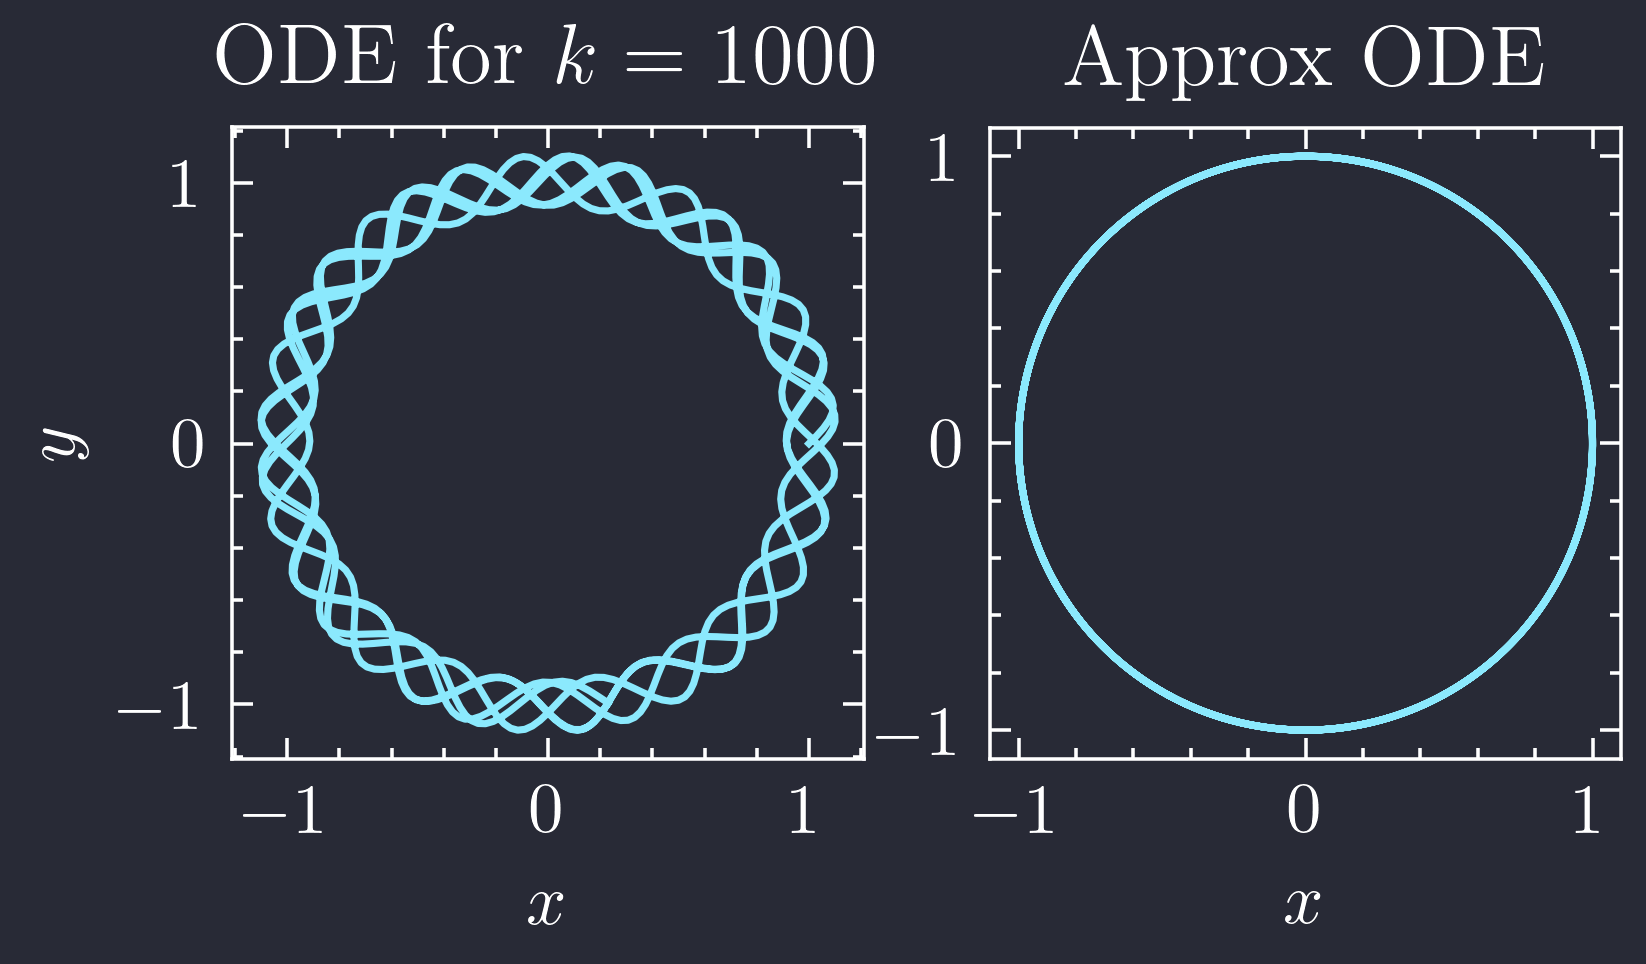

In [296]:
# 2(c) for really large k
def mass_rotating_spring_large_k(t, s): # s[0] = r, s[1] = phi
    r = s[0]
    v_r = 0
    omega = s[3]
    dot_v_r =  -k
    dot_omega = v_r / r
    return [v_r, omega, dot_v_r, dot_omega]

solution_r_omega = solve_ivp(mass_rotating_spring_large_k, [0, 10], [r_o, 0, v_o, omega_o], t_eval=t, dense_output=True)
x_pos_large_k, y_pos_large_k = pos(solution_r_omega)

# plt.plot(x_pos_large_k, y_pos_large_k)
# plt.xlabel('$x$')
# plt.ylabel('$y$')
# plt.gca().set_aspect("equal")
# plt.show()

# subplots
k = 1000
solution_r_omega = solve_ivp(mass_rotating_spring, [0, 10], [r_o, 0, v_o, omega_o], t_eval=t, dense_output=True)
x_pos3, y_pos3 = pos(solution_r_omega)

fig, ax = plt.subplots(1, 2)
ax[0].plot(x_pos3, y_pos3)
ax[0].set_title('ODE for $k=1000$')
ax[0].set_ylabel('$y$')

ax[1].plot(x_pos_large_k, y_pos_large_k)
ax[1].set_title('Approx ODE')
for i in range(2):
    ax[i].set_xlabel('$x$')
    ax[i].set_aspect('equal')


plt.show()


(c) As $k$ gets really large, the spring will be very stiff and the mass will oscillate less and less
in the radial direction, so the motion will be more circular but with small wiggles in $r$.
And as $k \to \infty$, the trajectory will be a perfect circle since spring will be pretty much incompressible/extendable.

## Problem 3

(a)

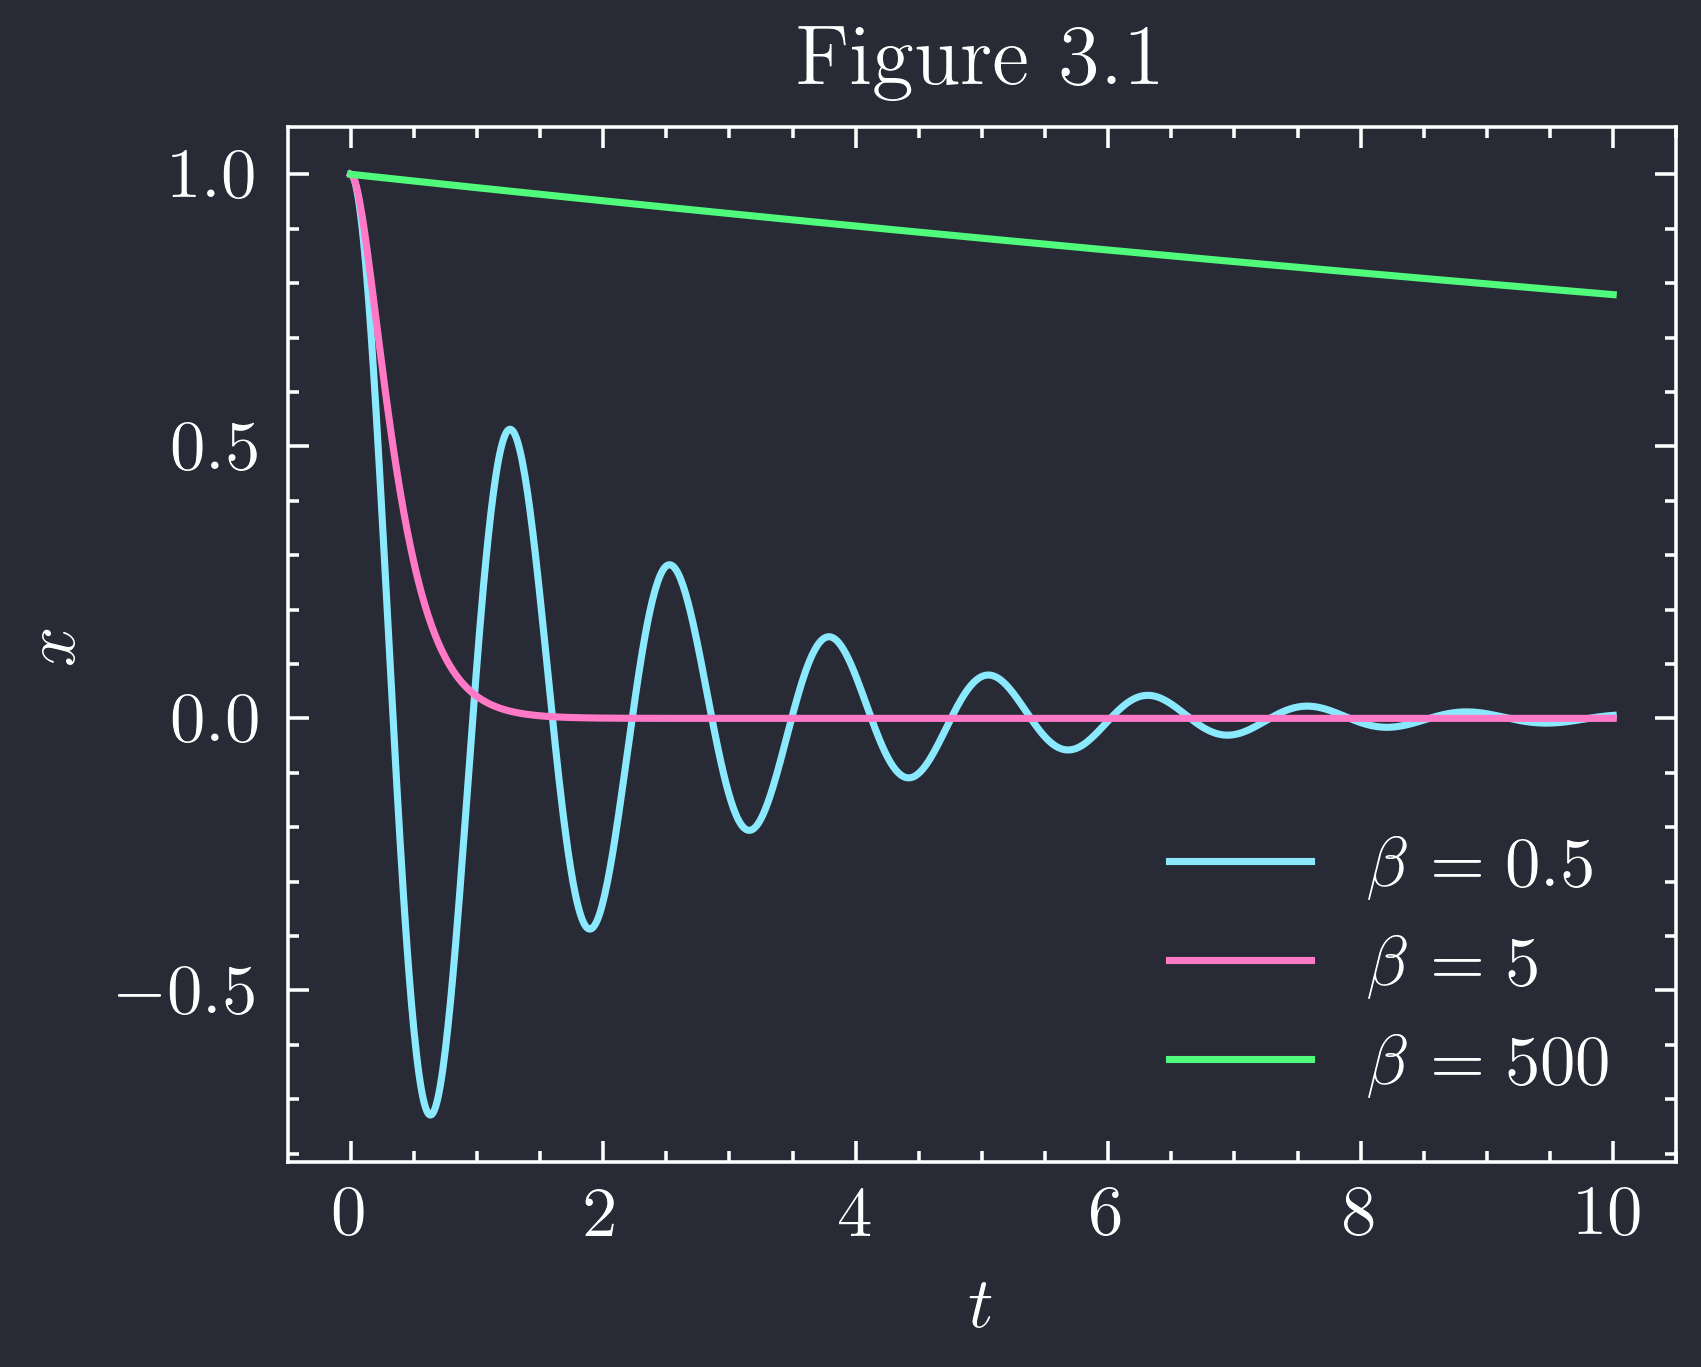

In [297]:
# 3(a)
# parameters
omega_o = 5 # 1 / s
beta_values = [0.5, 5, 500]

# ode
def damped_oscillator(t, s): # s[0] = x, s[1] = dot_x
    x = s[0]
    dot_x = s[1]
    ddot_x = -2 * beta * dot_x - omega_o ** 2 * x
    return [dot_x, ddot_x]

# initial conditions
x_o = 1 # m
dot_x_o = 0 # m / s

# solve ode for different beta
solution = []
for beta in beta_values:
    solution.append(solve_ivp(damped_oscillator, [0, 10], [x_o, dot_x_o], t_eval=t, dense_output=True))

# plot
for i, beta in enumerate(beta_values):
    plt.plot(t, solution[i].y[0], label=f'$\\beta = {beta}$')
plt.xlabel('$t$')
plt.ylabel('$x$')
plt.legend()
plt.title('Figure 3.1')
plt.show()

For $\beta = 0.5 \textrm{ s}^{-1}$ , the motion is still oscillatory (periodic) with a slow decay in
amplitude which is in the regime of **underdamping** (weak): $\beta < \omega_o$.

For $\beta = 5 \textrm{ s}^{-1} = \omega_o$, this is the **critical damping** case as the motion dies out
the fastest.

For $\beta = 500 \textrm{ s}^{-1} > \omega_o$, this is **overdamping** as the motion dies out very 
slowly. 
 
(b)

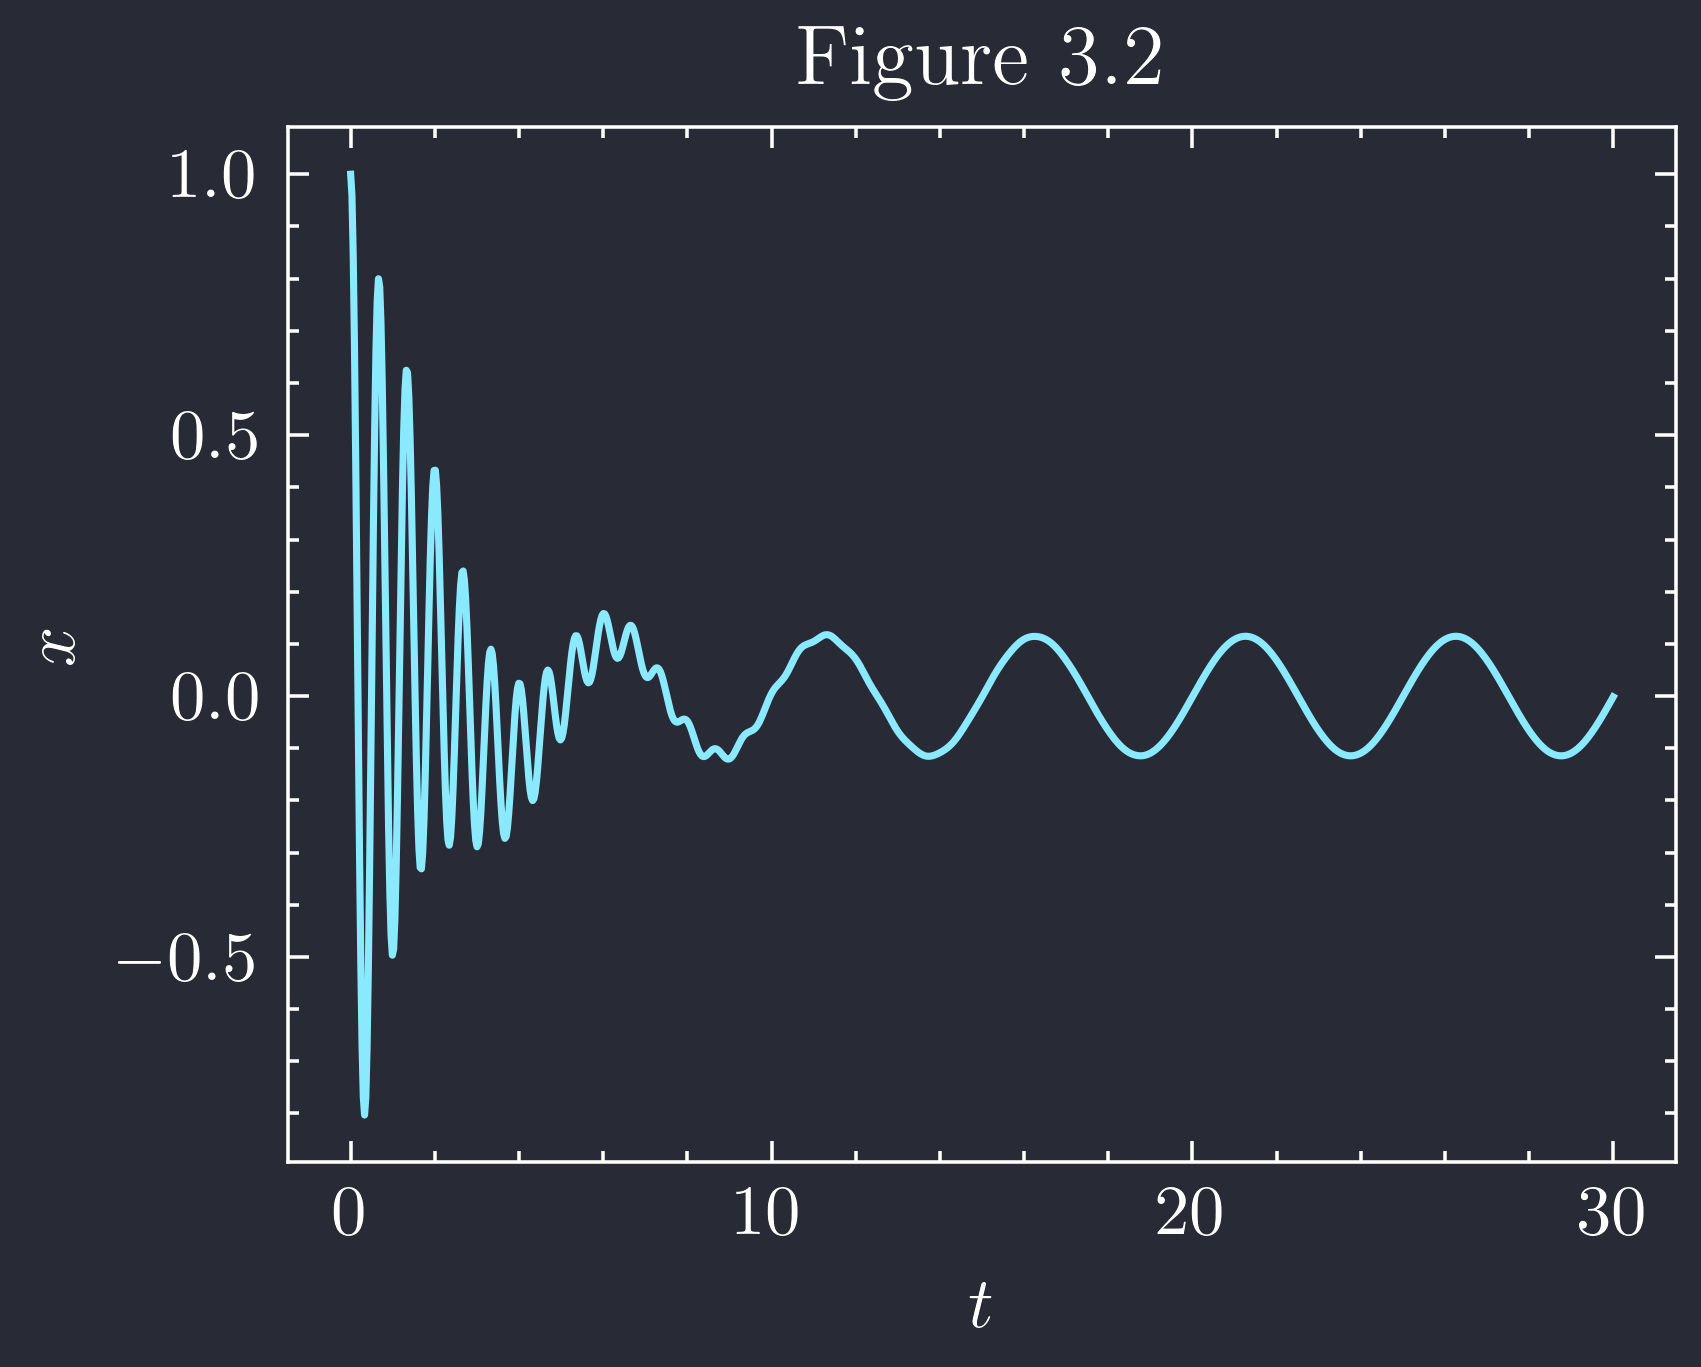

In [298]:
# 3(b)
# params
omega_o = 3 * np.pi # 1 / s
omega_d = 2 * np.pi / 5 # 1 / s
beta = 0.5 # 1 / s
f_o = 10.0 # m / s^2
t_driven = np.linspace(0, 30, 1000)

# ODE
def driven_damped_oscillator(t, s): # s[0] = x, s[1] = dot_x
    x = s[0]
    dot_x = s[1]
    ddot_x = f_o * np.sin(omega_d * t) - 2 * beta * dot_x - omega_o ** 2 * x
    return [dot_x, ddot_x]

# solve ODE
solution_driven = solve_ivp(driven_damped_oscillator, [0, 30], [x_o, dot_x_o], t_eval=t_driven, dense_output=True)

# plot
plt.plot(t_driven, solution_driven.y[0])
plt.xlabel('$t$')
plt.ylabel('$x$')
plt.title('Figure 3.2')
plt.show()

[11.32132132 16.24624625 21.26126126 26.27627628]
[44, 208, 375, 542]
Average period: 4.984984984984986 s
Average period (manual): 4.984984984984986 s
[ 0.66066066  1.32132132  2.01201201  2.67267267  3.33333333  3.99399399
  4.68468468  5.34534535  6.00600601  6.63663664  7.26726727  7.92792793
  8.64864865 11.32132132 16.24624625 21.26126126 26.27627628]
[11.32132132 16.24624625 21.26126126 26.27627628]
Average period (full): 4.984984984984986 s


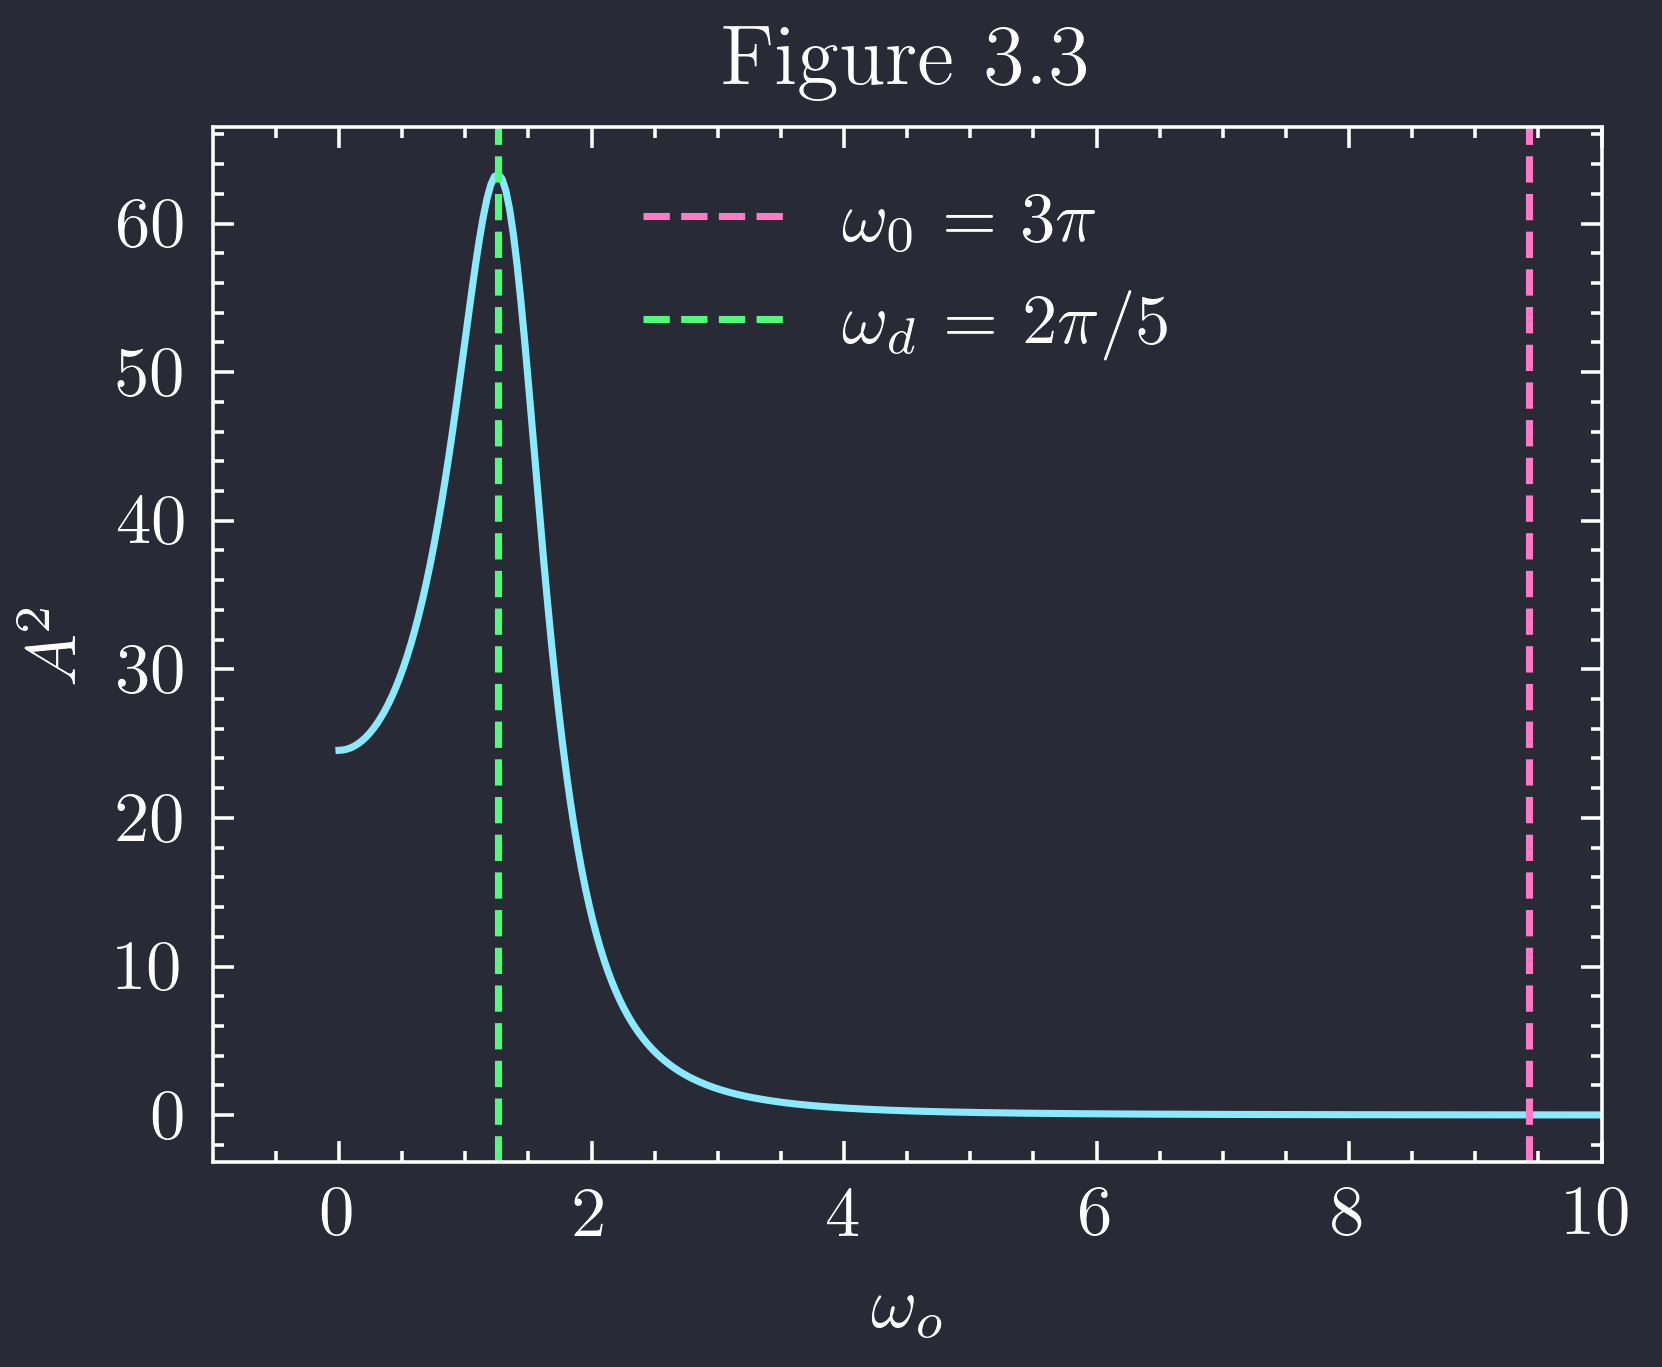

In [299]:
# 3(b) this is cool, right?
from scipy.signal import find_peaks

# ignore transient t < 10 s
index = np.where(t_driven == 10)[0][0]
solution_driven_cut = solution_driven.y[0][index:]
t_driven_cut = t_driven[index:]

# find time between peaks
peak_times = t_driven_cut[find_peaks(solution_driven_cut)[0]]
print(peak_times)
# average period
period = np.mean(np.diff(peak_times))

# versus doing it without scipy
def find_peaks_manual(arr):
    peaks = []
    for i in range(1, len(arr) - 1):
        if arr[i] > arr[i-1] and arr[i] > arr[i+1]:
            peaks.append(i)
    return peaks

print(find_peaks_manual(solution_driven_cut))
peak_times_manual = t_driven_cut[find_peaks_manual(solution_driven_cut)]

print(f'Average period: {period} s')
print(f'Average period (manual): {np.mean(np.diff(peak_times_manual))} s')

# another way to do it
peak_times_full = t_driven[find_peaks(solution_driven.y[0])[0]]
print(peak_times_full)

# ignore transient t < 10 s
peak_times_full = np.delete(peak_times_full, np.where(peak_times_full < 10))
print(peak_times_full)

# average period
period_full = np.mean(np.diff(peak_times_full))
print(f'Average period (full): {period_full} s')

#  omega to amplitude
omega_o_of_t = np.linspace(0, 30, 1000)
A_squared = f_o ** 2 / ((omega_o_of_t ** 2 - omega_d ** 2) ** 2 + (2 * beta * omega_d) ** 2)

plt.plot(omega_o_of_t, A_squared)
plt.xlabel('$\omega_o$')
plt.ylabel('$A^2$')
plt.axvline(omega_o, linestyle='--', color=colorcycle[1], label='$\omega_0$ = 3$\pi$')
plt.axvline(omega_d, linestyle='--', color=colorcycle[2], label='$\omega_d$ = 2$\pi$/5')
plt.legend()
plt.title('Figure 3.3')
plt.xlim(-1, 10)
plt.show()

The motion first has a transient preiod of fast oscillation large amplitude that decay very quickly 
unitl it reaches a steady sinosoidal motion with a much smaller amplitude. The period of the 
oscillation after the transient period, $T = 4.98$ s, is the same as the period of the driving force
$$ T_d = \frac{2\pi}{\omega_d} = \frac{2\pi}{2\pi/5} = 5 \textrm{ s}$$
which is expected as the transient decays at the same rate as the example of $\beta = 0.5$ from 
part (a), so after $t > 10$ s the transient oscillation dies out and we are left with only the
driving force directing the motion. The driving force is **not in resonance** since $\omega_d \neq \omega_o$
nor are they approximately equal as we graph $A^2$ as a function of $\omega_o$ (Fig 3.3) we can see that the 
driving frequency is not within the bounds of the natural frequency to be in resonance.

## Problem 4

(a) The equation of motion for the driven damped oscillator is
$$ \ddot x + 2 \beta \dot x + \omega_o^2 x  = f(t) $$ 
where $f(t)$ is a force per unit mass of the driving force:
$$ f(t) = \frac{F(t)}{m} $$
and the driving force is $F(t) =  F_o \cos(\omega t)$. One particular solution to this EOM
(as derived in class/Taylor) is
$$ x(t) = A \cos(\omega t - \delta) $$
where $A$ and $\delta$ are:
$$ A = \frac{F_o/m}{\sqrt{(\omega_o^2 - \omega^2)^2 + (2 \beta \omega)^2}} = \frac{F_o}{mL}$$
and
$$ \delta = \arctan\left(\frac{2 \beta \omega}{\omega_o^2 - \omega^2}\right) $$
where we define $L = \sqrt{(\omega_o^2 - \omega^2)^2 + (2 \beta \omega)^2}$ is the hypotenuse of a
right triangle with angle $\delta$. The equation for the power (rate of force doing work) of the
driving force after the initial transient phase is
$$ P(t) = F(t) \dot x(t) $$
where $\dot x(t)$ is
$$ \dot x(t) = -\omega A \sin(\omega t - \delta) $$
so
$$ P(t) = F_o \cos(\omega t) (-\omega A \sin(\omega t - \delta)) = -F_o \omega A \sin(\omega t - \delta) \cos(\omega t) $$
Averaging $P(t)$ over a complete cycle:
$$ \langle P \rangle = \frac{1}{T} \int_t^{t+T} P(t') dt'
    = -\frac{F_o \omega A}{T} \int_t^{t+T} \sin(\omega t' - \delta) \cos(\omega t') dt' $$
where $T$ is the period of complete cycle. We can use the trigonometric identity
$$ \sin(\alpha) \cos(\beta) = \frac{1}{2} \left( \sin(\alpha + \beta) + \sin(\alpha - \beta) \right) $$
to rewrite the integral as
$$ \frac{1}{2} \int_t^{t+T} \sin(2 \omega t' - \delta) + \sin(-\delta) dt'
    = \frac{1}{2} \int_t^{t+T} \sin(2 \omega t' - \delta) - \sin(\delta) dt'$$
where sine is an odd function thus $\sin(-\delta) = -\sin(\delta)$. The integral of the first term is zero
as we are integrating over a complete cycle (i.e 
$$ \int_0^{t + T} \sin(2\omega t' - \delta) dt' = -\frac{1}{2\omega} \left[ \cos(2\omega(t+T) - \delta) - \cos(2\omega t - \delta) \right] $$
where $$\cos(2\omega(t+T) - \delta) = \cos(2\omega t - \delta)$$ thus the integral is zero),
so the average power is
$$ \langle P \rangle = -\frac{F_o \omega A}{2 T}  \int_t^{t+T} -\sin(\delta) dt'
    = \frac{F_o \omega A}{2 T} \sin(\delta) T = \frac{F_o \omega A}{2} \sin(\delta) $$
and using Pythagorean theorem we known $\sin(\delta) = \frac{2 \beta \omega}{L}$ so
$$ \langle P \rangle = \frac{F_o \omega A}{2} \frac{2 \beta \omega}{L} = \frac{F_o \beta \omega^2 A}{L} $$
and substituting $F_o = m L A$ (from the amplitude eq) we get
$$ \langle P \rangle = \frac{(mLA) \beta \omega^2}{L} A = m \beta \omega^2 A^2 $$

(b) From the original EOM
$$ m \ddot x = F(t) - 2m \beta \dot x - m \omega_o^2 x $$
where $b = 2m\beta$ so the damping force is $f = -b v$. To find the work done by the damping force
averaged over a complete cycle ($t \to t+T$) we must integrate $dW$ over a complete cycle and divide
by the period $T$. The change in work done by the damping force is:
$$ \frac{d}{dt} W = f v = -b v^2 $$
where
$$ v = \dot x(t) = -\omega A \sin(\omega t - \delta) $$
so
$$ \frac{d}{dt} W = -2m\beta \omega^2 A^2 \sin^2(\omega t - \delta) $$
and multiplying both sides by $dt$
$$ dW = -2m\beta \omega^2 A^2 \sin^2(\omega t - \delta) dt $$
Averaging $dW$ over a complete cycle:
$$ \frac{1}{T} (-2m\beta \omega^2 A^2) \int_t^{t+T} \sin^2(\omega t' - \delta) dt' $$
using the trig identity
$$ \sin(\alpha - \beta) = \sin(\alpha) \cos(\beta) - \cos(\alpha) \sin(\beta) $$
we can rewrite the integral as
$$ \int_t^{t+T} (\sin(\omega t') \cos(\delta) - \cos(\omega t') \sin(\delta))^2 dt' $$
$$ \begin{align*}
    \int_t^{t+T} \sin^2(\omega t') \cos^2(\delta) - 2 \sin(\omega t') \cos(\omega t') \sin(\delta)\cos(\delta)
        + \cos^2(\omega t') \sin^2(\delta) dt'
    \end{align*} $$
and from the following useful integrals:
$$ \int_t^{t+T} \sin^2(\omega t') dt' = \int_t^{t+T} \cos^2(\omega t') dt' = T/2, \quad \int_t^{t+T} \sin(\omega t') \cos(\omega t') dt' = 0 $$
we can simplify the integral to
$$ \frac{T}{2} \cos^2(\delta) + \frac{T}{2} \sin^2(\delta) = \frac{T}{2} $$
so the average work done by the damping force is
$$ \frac{1}{T} (-2m\beta \omega^2 A^2) \frac{T}{2} = -m\beta \omega^2 A^2 = -\langle P \rangle$$

## Problem 5

Given
$$ m \ddot x + b \dot x + k x = F(t) $$
where $b = 2m\beta$, $k = m\omega_o^2$ and $F(t)$ is a step function force:
$$ F(t) = \begin{cases}
    0 & \textrm{if } t < 0 \\
    F & \textrm{if } t > 0
\end{cases} $$
where $F$ is a constant, and assume $\beta < \omega_o$.
This is an inhomogeneous equation where the general solution is the linear combination of the
homogeneous solution and the particular solution:
$$ x(t) = x_h(t) + x_p(t) $$

### Homogeneous Solution

The homogeneous solution is the solution to the EOM without the driving force:
$$ \ddot x + 2\beta \dot x + \omega_o^2 x = 0 $$
with a solution of the form $x_h(t) = e^{rt}$ with derivatives
$$ \dot x_h(t) = r e^{rt} \quad \ddot x_h(t) = r^2 e^{rt} $$
so the EOM becomes
$$ r^2 e^{rt} + 2\beta r e^{rt} + \omega_o^2 e^{rt} = 0 $$
dividing by $e^{rt}$
$$ r^2 + 2\beta r + \omega_o^2 = 0 $$
which is a quadratic equation with two independent solutions
$$ r_{1,2} = -\beta \pm \sqrt{\beta^2 - \omega_o^2} $$
so the homogeneous solution is a linear combination of the two independent solutions
$$ x_h(t) = C_1 e^{r_1 t} + C_2 e^{r_2 t} $$
where $C_1$ and $C_2$ are constants to be determined by the initial conditions...

### Particular Solution

For the particular solution we know that $D x_p(t) = f(t) = F(t)/m $ where $D$ is the differential operator
$$ D = \frac{d^2}{dt^2} + 2\beta \frac{d}{dt} + \omega_o^2 $$
and since we know that $F(t)$ is a constant value $F$ for $t > 0$ we can assume that the particular solution
is also a constant value $x_p(t) = C_3$ with derivatives
$$ \dot x_p(t) = 0 \quad \ddot x_p(t) = 0 $$
so the EOM becomes
$$ 0 + 0 + k C_3 = F \implies C_3 = \frac{F}{k} $$ 
so the particular solution is
$$ x_p(t) = \frac{F}{k} $$

### General solution

The general solution is the linear combination of the homogeneous and particular solutions
$$ x(t) = C_1 e^{r_1 t} + C_2 e^{r_2 t} + \frac{F}{k} \qquad
    \dot x(t) = C_1 r_1 e^{r_1 t} + C_2 r_2 e^{r_2 t} $$
where $C_1$ and $C_2$ are set by the initial conditions $x(0) = 0$ and $\dot x(0) = 0$:
$$ x(0) = C_1 + C_2 + \frac{F}{k} = 0 \implies C_1 + C_2 = -\frac{F}{k} $$
and
$$ \dot x(0) = r_1 C_1 + r_2 C_2 = 0 $$
either using Gauss-Jordan elimination or substitution we can solve for $C_1$ and $C_2$, but we'll use
substitution by solving the second equation for $C_1$:
$$ C_1 = -C_2 \frac{r_2}{r_1} $$
and substituting into the first equation
$$ \begin{align*}
        -C_2 \frac{r_2}{r_1} + C_2 &= -\frac{F}{k} \\ 
        C_2\left(\frac{r_2}{r_1} - 1\right) &= \frac{F}{k} \\
        C_2 &= \frac{F}{k} \frac{1}{r_2/r_1 - 1}
    \end{align*} $$
and substituting back into the $C_1$ equation
$$ \begin{align*}
        C_1 &= -\frac{F}{k} \frac{1}{\frac{r_2}{r_1} - 1} \frac{r_2}{r_1} \\
        &= \frac{F}{k} \frac{-r_2}{r_1 - r_2} \\
        &= \frac{F}{k} \frac{r_2}{r_2 - r_1} \\
        &= \frac{F}{k} \frac{r_2}{r_2 - r_1} \frac{1/r_2}{1/r_2} \\
        C_1 &= \frac{F}{k} \frac{1}{r_1/r_2 - 1} \\
    \end{align*} $$
so for $t > 0$ the general solution is
$$ x(t) = \frac{F}{k} + \frac{F}{k} \frac{1}{r_1/r_2 - 1} e^{r_1 t}
    + \frac{F}{k} \frac{1}{r_2/r_1 - 1} e^{r_2 t} $$
or
$$ x(t) = \frac{F}{k} \left(1 + \frac{1}{r_1/r_2 - 1} e^{r_1 t} + \frac{1}{r_2/r_1 - 1} e^{r_2 t}\right) $$
where $r_{1,2} = -\beta \pm \sqrt{\beta^2 - \omega_o^2}$. As $t \to \infty$ the exponential terms
will go to zero and we are left with
$$ \lim_{t \to \infty} x(t) = \frac{F}{k} = \frac{F}{m\omega_o^2} $$
